# Exploratory Data Analysis

### Module imports and dataset loading

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, f_oneway
from itertools import combinations

training_data = pd.read_csv('/home/thorpe/git_repos/Capstone/results/eda/training/image_attributes.csv')
testing_data = pd.read_csv('/home/thorpe/git_repos/Capstone/results/eda/testing/image_attributes.csv')

### Dataset & Class counts

In [6]:
# Total counts for each dataset
total_training_count = len(training_data)
total_testing_count = len(testing_data)

# Total counts for each class w/ respect to each dataset
training_class_counts = training_data['class'].value_counts()
testing_class_counts = testing_data['class'].value_counts()


In [10]:
# Displaying counts
print(f'Number of Training Images: {total_training_count}')
print(f'Number of Testing Images: {total_testing_count}\n')
print(f'Number of Images in each class (Training):\n{training_class_counts}\n')
print(f'Number of Images in each class (Testing):\n{testing_class_counts}')


Number of Training Images: 5503
Number of Testing Images: 1281

Number of Images in each class (Training):
class
pituitary     1445
notumor       1404
meningioma    1333
glioma        1321
Name: count, dtype: int64

Number of Images in each class (Testing):
class
notumor       381
meningioma    301
pituitary     300
glioma        299
Name: count, dtype: int64


## Checking Normality of Data

### Training Dataset

In [24]:
# Check normality for each attribute overall
overall_m_stat, overall_m_p = shapiro(training_data['mean_intensity'])
overall_s_stat, overall_s_p = shapiro(training_data['std_intensity'])

# Check normality for each attribute w/ respect to each class
normality_dict = {}
class_names = training_data['class'].unique()
for name in class_names:
    m_stat, m_p = shapiro(training_data[training_data['class'] == name]['mean_intensity'])
    s_stat, s_p = shapiro(training_data[training_data['class'] == name]['std_intensity'])

    normality_dict[f"m_{name}"] = {'stat': m_stat, 'p': m_p}
    normality_dict[f"s_{name}"] = {'stat': s_stat, 'p': s_p}



/home/thorpe/.pyenv/versions/3.9.18/envs/resnet50/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
print(f'Shapiro-Wilk Test for training data overall mean_intensity: Statistics={overall_m_stat}, p={overall_m_p}')
print(f'Shapiro-Wilk Test for training data overall std_intensity: Statistics={overall_s_stat}, p={overall_s_p}\n')

for key, value in normality_dict.items():
    print(f'Shapiro-Wilk Test for training data {key}: Statistics={value["stat"]}, p={value["p"]}')


Shapiro-Wilk Test for training data overall mean_intensity: Statistics=0.9148577451705933, p=0.0
Shapiro-Wilk Test for training data overall std_intensity: Statistics=0.8564019799232483, p=0.0

Shapiro-Wilk Test for training data m_pituitary: Statistics=0.9879189133644104, p=1.3741778825959727e-09
Shapiro-Wilk Test for training data s_pituitary: Statistics=0.9865121245384216, p=2.4424109956733275e-10
Shapiro-Wilk Test for training data m_meningioma: Statistics=0.79588383436203, p=5.944533974978323e-38
Shapiro-Wilk Test for training data s_meningioma: Statistics=0.8516072034835815, p=1.2929374403999653e-33
Shapiro-Wilk Test for training data m_notumor: Statistics=0.9744928479194641, p=4.619278507741803e-15
Shapiro-Wilk Test for training data s_notumor: Statistics=0.9785709381103516, p=1.3156458615690841e-13
Shapiro-Wilk Test for training data m_glioma: Statistics=0.9729107022285461, p=4.8723448473270755e-15
Shapiro-Wilk Test for training data s_glioma: Statistics=0.9990653395652771, p=0

### Testing Dataset

In [26]:
# Check normality for each attribute overall
overall_m_stat, overall_m_p = shapiro(testing_data['mean_intensity'])
overall_s_stat, overall_s_p = shapiro(testing_data['std_intensity'])

# Check normality for each attribute w/ respect to each class
normality_dict = {}
class_names = testing_data['class'].unique()
for name in class_names:
    m_stat, m_p = shapiro(testing_data[testing_data['class'] == name]['mean_intensity'])
    s_stat, s_p = shapiro(testing_data[testing_data['class'] == name]['std_intensity'])

    normality_dict[f"m_{name}"] = {'stat': m_stat, 'p': m_p}
    normality_dict[f"s_{name}"] = {'stat': s_stat, 'p': s_p}

In [23]:
# Display results
print(f'Shapiro-Wilk Test for testing data overall mean_intensity: Statistics={overall_m_stat}, p={overall_m_p}')
print(f'Shapiro-Wilk Test for testing data overall std_intensity: Statistics={overall_s_stat}, p={overall_s_p}\n')

for key, value in normality_dict.items():
    print(f'Shapiro-Wilk Test for testing data {key}: Statistics={value["stat"]}, p={value["p"]}')


Shapiro-Wilk Test for testing data overall mean_intensity: Statistics=0.9061893224716187, p=2.389370703951014e-27
Shapiro-Wilk Test for testing data overall std_intensity: Statistics=0.88349848985672, p=5.7463840095314664e-30

Shapiro-Wilk Test for testing data m_pituitary: Statistics=0.9957460761070251, p=0.5913278460502625
Shapiro-Wilk Test for testing data s_pituitary: Statistics=0.9844411611557007, p=0.00245380075648427
Shapiro-Wilk Test for testing data m_meningioma: Statistics=0.8857771158218384, p=3.175270376493122e-14
Shapiro-Wilk Test for testing data s_meningioma: Statistics=0.9112392067909241, p=2.4484537661240147e-12
Shapiro-Wilk Test for testing data m_notumor: Statistics=0.9624143242835999, p=2.602095960924089e-08
Shapiro-Wilk Test for testing data s_notumor: Statistics=0.9635683298110962, p=3.933421766078027e-08
Shapiro-Wilk Test for testing data m_glioma: Statistics=0.9806674122810364, p=0.0004577030485961586
Shapiro-Wilk Test for testing data s_glioma: Statistics=0.995

### General Observation
* Metric of interest predominantly mean_intensity
* W/in a both datasets, mean pixel intensity appears normal 
* Between classes
  * training dataset appears mostly normal, some drift seen in meningioma
  * testing dataset also appears mostly normally distributed except for pituitary

## Checking Variance of data

### Training Dataset

In [36]:
# mean_intensity one-way ANOVA test between classes
class_groups = training_data.groupby('class')['mean_intensity'].apply(list)
m_anova_result = f_oneway(*class_groups)


# std_intensity one-way ANOVA test between classes
class_groups = training_data.groupby('class')['std_intensity'].apply(list)
s_anova_result = f_oneway(*class_groups)

In [37]:
# Run One-Way ANOVA between classes for mean_intensity and std_intensity
# Get unique classes
unique_classes = training_data['class'].unique()

# Perform pair-wise ANOVA
combinations_dict = {}
for class1, class2 in combinations(unique_classes, 2):
    # Extract mean_intensity for each class
    mean_intensity_1 = training_data[training_data['class'] == class1]['mean_intensity']
    mean_intensity_2 = training_data[training_data['class'] == class2]['mean_intensity']

    # Perform ANOVA
    anova_result = f_oneway(mean_intensity_1, mean_intensity_2)

    # Store results
    combinations_dict[f"{class1}_{class2}"] = {"F-statistic": anova_result.statistic, "p-value": anova_result.pvalue}    


In [38]:
# Display ANOVA results
print(f"ANOVA test result for training data mean_intensity: {m_anova_result}")
print(f"ANOVA test result for training data std_intensity: {s_anova_result}\n")

for key, value in combinations_dict.items():
    key = key.replace('_', ' vs ')
    print(f"ANOVA test result for {key}: F-statistic = {value['F-statistic']}, p-value = {value['p-value']}")


ANOVA test result for training data mean_intensity: F_onewayResult(statistic=954.8603922925109, pvalue=0.0)
ANOVA test result for training data std_intensity: F_onewayResult(statistic=1520.2372604081793, pvalue=0.0)

ANOVA test result for pituitary vs meningioma: F-statistic = 178.8036863583316, p-value = 1.4432602523371443e-39
ANOVA test result for pituitary vs notumor: F-statistic = 391.7666750667963, p-value = 8.460462343404986e-82
ANOVA test result for pituitary vs glioma: F-statistic = 2669.57150045789, p-value = 0.0
ANOVA test result for meningioma vs notumor: F-statistic = 649.7567961208529, p-value = 8.942945934898636e-129
ANOVA test result for meningioma vs glioma: F-statistic = 548.1309399001738, p-value = 2.3906625478957854e-110
ANOVA test result for notumor vs glioma: F-statistic = 2028.4935479985998, p-value = 0.0


### Testing Dataset

In [39]:
# mean_intensity one-way ANOVA test between classes
class_groups = testing_data.groupby('class')['mean_intensity'].apply(list)
m_anova_result = f_oneway(*class_groups)


# std_intensity one-way ANOVA test between classes
class_groups = testing_data.groupby('class')['std_intensity'].apply(list)
s_anova_result = f_oneway(*class_groups)

In [40]:
# Run One-Way ANOVA between classes for mean_intensity and std_intensity
# Get unique classes
unique_classes = testing_data['class'].unique()

# Perform pair-wise ANOVA
combinations_dict = {}
for class1, class2 in combinations(unique_classes, 2):
    # Extract mean_intensity for each class
    mean_intensity_1 = testing_data[testing_data['class'] == class1]['mean_intensity']
    mean_intensity_2 = testing_data[testing_data['class'] == class2]['mean_intensity']

    # Perform ANOVA
    anova_result = f_oneway(mean_intensity_1, mean_intensity_2)

    # Store results
    combinations_dict[f"{class1}_{class2}"] = {"F-statistic": anova_result.statistic, "p-value": anova_result.pvalue}    

In [41]:
# Display ANOVA results
print(f"ANOVA test result for testing data mean_intensity: {m_anova_result}")
print(f"ANOVA test result for testing data std_intensity: {s_anova_result}\n")

for key, value in combinations_dict.items():
    key = key.replace('_', ' vs ')
    print(f"ANOVA test result for {key}: F-statistic = {value['F-statistic']}, p-value = {value['p-value']}")

ANOVA test result for testing data mean_intensity: F_onewayResult(statistic=129.32704497873928, pvalue=3.7423410860725696e-73)
ANOVA test result for testing data std_intensity: F_onewayResult(statistic=248.92781401730787, pvalue=3.60192511945826e-127)

ANOVA test result for pituitary vs meningioma: F-statistic = 11.89317435121754, p-value = 0.0006029542956332431
ANOVA test result for pituitary vs notumor: F-statistic = 77.20013564606398, p-value = 1.2546626848783946e-17
ANOVA test result for pituitary vs glioma: F-statistic = 410.1587896854385, p-value = 8.154466965982369e-70
ANOVA test result for meningioma vs notumor: F-statistic = 18.730405700754403, p-value = 1.731864550393506e-05
ANOVA test result for meningioma vs glioma: F-statistic = 183.78840390384957, p-value = 1.0603402590044126e-36
ANOVA test result for notumor vs glioma: F-statistic = 348.03705933077117, p-value = 5.275840157665911e-63


### General Observations
* Looking to see if either mean_intensity or std_intensity could influence training or generalization of model
* Training Dataset: 
  * First look shows clear indication of influence due to variance
  * Per class inspection shows all classes have clear difference in values w/ glioma's intensity appearing as a large potential influence
* Testing Dataset:
  * Again shows clear difference in variation between classes
  * glioma again appearing to have a larger score than the others. 

## Investigating Class Imbalance

### Training Dataset

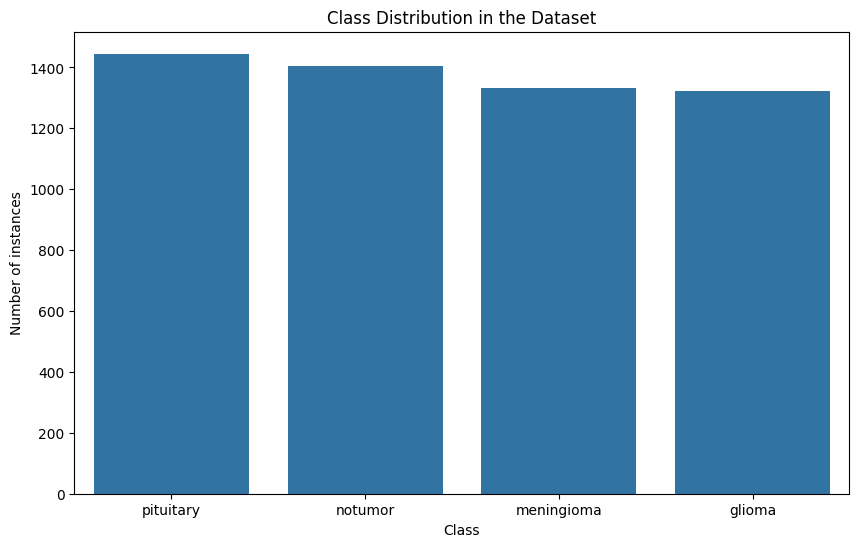

In [42]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=training_class_counts.index, y=training_class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class Distribution in the Dataset')
plt.show()

### Testing Dataset

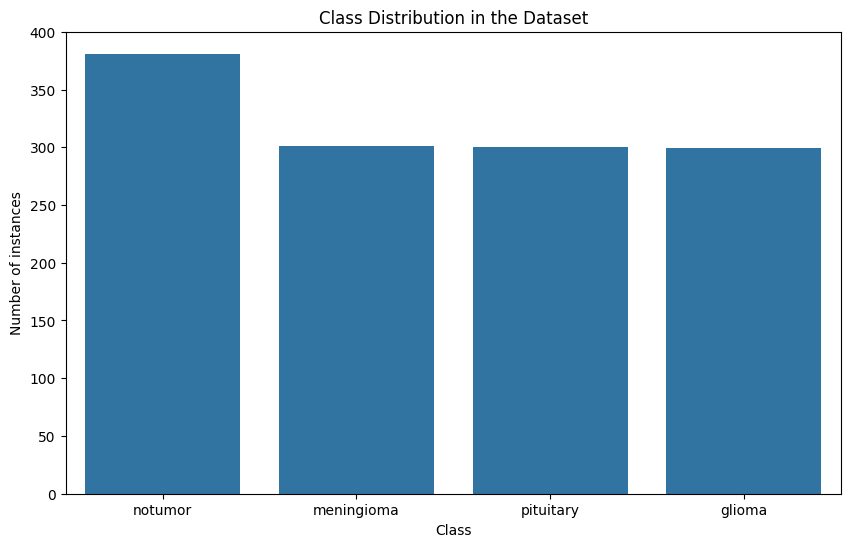

In [43]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=testing_class_counts.index, y=testing_class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class Distribution in the Dataset')
plt.show()

### General Observations
* Classes appear to have relatively balanced instances across both the training and testing datasets